<a href="https://colab.research.google.com/github/gmdeorozco/Exploratory-Data-Analysis/blob/main/FeatureEngReplica1_1to6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import Packages

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## 2. Load Data 
sep = \t

In [3]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data.tsv'
data = pd.read_csv(URL, sep='\t')

## 3. Print the number of rows and columns in the Data

In [4]:
print('number of rows -> ', data.shape[0])
print('number of cols -> ', data.shape[1])

number of rows ->  2930
number of cols ->  82


## 4. Create a dataset including Gr Liv Area lower or equal to 4000

In [5]:
data1 = data.copy()
data1 = data1.loc[ data1['Gr Liv Area']<=4000,:]
data1.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 5. We're going to first do some basic data cleaning on this data:

- Converting categorical variables to dummies
  - Filter by String Categoricals
  - List categorical fields
  - Show fields
  - Convert to dummies

In [6]:
one_hot_encode_cols = data1.dtypes[data1.dtypes == object ] #FIlter by string categorical

In [7]:
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
data1[one_hot_encode_cols].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm


In [8]:
data2 = pd.get_dummies(data1, columns=one_hot_encode_cols, drop_first=True)
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2925.0,1.464795e+03,8.464417e+02,1.0,732.0,1463.0,2199.0,2.930000e+03
PID,2925.0,7.143931e+08,1.887274e+08,526301100.0,528477030.0,535453210.0,907180130.0,1.007100e+09
MS SubClass,2925.0,5.739658e+01,4.266875e+01,20.0,20.0,50.0,70.0,1.900000e+02
Lot Frontage,2435.0,6.902382e+01,2.271092e+01,21.0,58.0,68.0,80.0,3.130000e+02
Lot Area,2925.0,1.010358e+04,7.781999e+03,1300.0,7438.0,9428.0,11515.0,2.152450e+05
...,...,...,...,...,...,...,...,...
Sale Condition_AdjLand,2925.0,4.102564e-03,6.393067e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Alloca,2925.0,8.205128e-03,9.022520e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Family,2925.0,1.572650e-02,1.244366e-01,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Normal,2925.0,8.246154e-01,3.803608e-01,0.0,1.0,1.0,1.0,1.000000e+00


- Making skew variables symmetric
  - Create list of float columns to check for skewing
  - define a limit above which we will log tranform
  - Show skewed columns
  - Create before and after histogram for 'BsmtFin SF 1'

In [11]:
mask = data2.dtypes == float
mask
float_cols = data2.columns[mask]

skew_limit = 0.75
skew_vals = data2[float_cols].skew()

In [14]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew)>{}'.format(skew_limit)))
skew_cols

,Skew
BsmtFin SF 2,4.135900
Bsmt Half Bath,3.965970
Mas Vnr Area,2.565458
Lot Frontage,1.111071
Bsmt Unf SF,0.925021
BsmtFin SF 1,0.821985


Text(0.5, 0.98, 'Field "BsmtFin SF 1"')

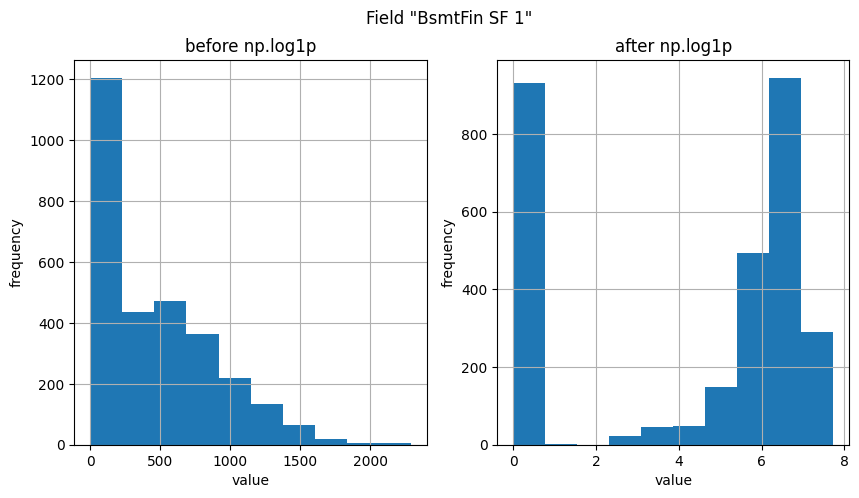

In [16]:
field = 'BsmtFin SF 1'

fig, (ax_before, ax_after) = plt.subplots(1,2,figsize=(10,5))
data2[field].hist(ax=ax_before)
data2[field].apply(np.log1p).hist(ax=ax_after)

ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field))


## 6. Perform skew tranformation with a for loop for all except 'SalesPrice'

In [19]:
for col in skew_cols.index.values:
  if col == 'SalePrice':
    continue
  data2[col] = data2[col].apply(np.log1p)

## 7. Show this partial dataset and fill with Zero any incomplete -> 'Lot Area', 'Overall Qual', 'Overall Cond','Year Built', 'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Fireplaces',         'Garage Cars','SalePrice'

##8. Do Pairplot of features

### 9. Define X and y
using ->
'Lot Area', 'Overall Qual', 'Overall Cond','Year Built', 'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
      'Garage Cars'

# Basic feature engineering: adding polynomial and interaction terms

## Polynomial **Features**

### 10. Create X2 a copy of X with 'OQ2' and 'GLA2' as pow 2

### 11. Create X3, a copy of X2 with a multiplicative interaction 'Overall Qual' and 'Year Built'

### 12. On X3 create division interaction 'Overall Qual' and 'Lot Area'

### 13. Count 'House Style'

### 14. Do a quick view of how dummy features actually appear for House Style

## 15. Create a list of Neighborhoods with less than 8
- Counst all values
- Create X4, a copy of X3 where the replace is made

## Getting to fancier features add deviation feature for 'House Style' and 'Year Built', and for 'Overall Qual' and 'Neighborhood'

# Polynomial Features in Scikit-Learn


Import the library and Instantiate